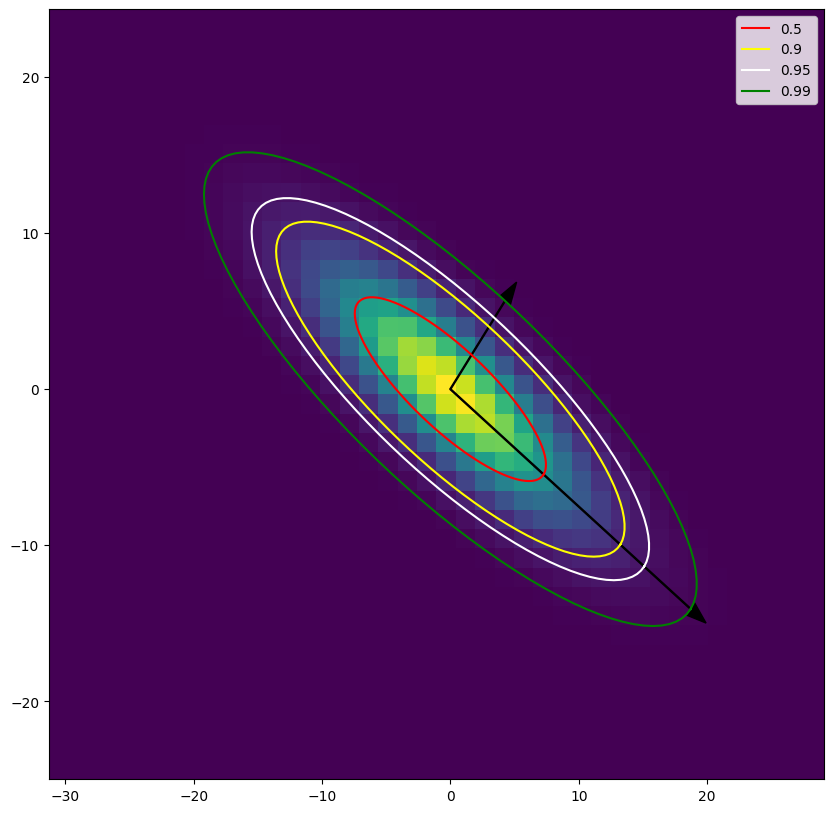

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.stats as st

B = np.array([[40, -26], [-26, 25]])
A = np.linalg.cholesky(B)
samples = A @ np.random.randn(2, 1000000)

def make_ellipse(quantile):
    matr = B * st.chi2.ppf(quantile, df=2)
    eigenvalues, eigenvectors = np.linalg.eig(matr)
    circle = np.array([np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100))])
    res = np.dot(np.dot(eigenvectors, np.diag(np.sqrt(np.abs(eigenvalues)))), circle)
    return res


quantilies = [0.5, 0.9, 0.95, 0.99]
colors = ['red',  'yellow', 'white', 'green']

plt.figure(figsize=(10, 10))
plt.hist2d(*samples, bins=40);

eigenvalues, eigenvectors = np.linalg.eig(B)
vect = np.dot(eigenvectors, np.diag(np.sqrt(np.abs(eigenvalues)))) * (st.chi2.ppf(0.99, 2) ** 0.5)

plt.arrow(0, 0, dx=vect[0, 0], dy=vect[1,0], color = 'black', head_width = 1, width=0.07)
plt.arrow(0, 0, dx=vect[0, 1], dy=vect[1,1], color = 'black', head_width = 1,  width=0.07)


for i in range(4):
    ellipse = make_ellipse(quantilies[i])
    plt.plot(ellipse[0, :], ellipse[1, :], color=colors[i], label=quantilies[i])
#ax.set_aspect('equal');
plt.legend();


